In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [ ]:
!wget --no-check-certificate \https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2023-11-24 15:57:49--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.207, 142.250.4.207, 142.251.10.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M  20.4MB/s    in 4.0s    

2023-11-24 15:57:54 (16.2 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
!unzip -n -q cats_and_dogs_filtered.zip

In [ ]:
import os
base_dir = "/content/cats_and_dogs_filtered"
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')

In [ ]:
from keras.utils import image_dataset_from_directory
IMG_RES = 224
training_set = image_dataset_from_directory(train_dir, batch_size=64, image_size=(IMG_RES, IMG_RES))
val_set = image_dataset_from_directory(val_dir, batch_size=64, image_size=(IMG_RES, IMG_RES))

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


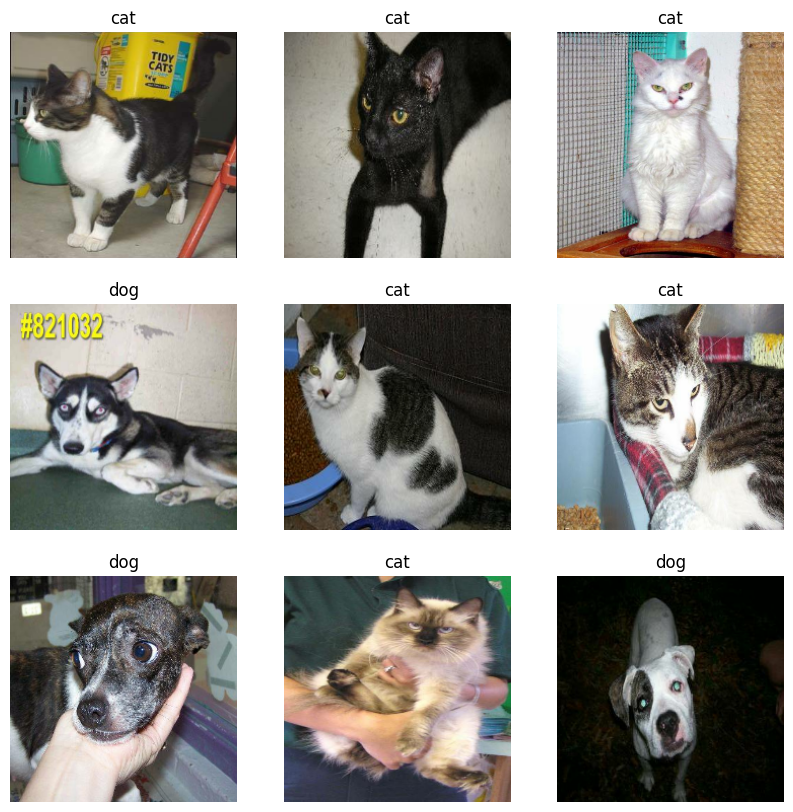

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for images, labels in training_set.take(1):
  for i in range(9):
    image = images[i]
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image.numpy().astype("int32"))
    label = "dog" if labels[i].numpy() == 1 else "cat"
    ax.set_title(label)
    plt.axis("off")

In [ ]:
from keras import layers
def build_model(n, n_layers, dropout, l1=False):
  inputs = keras.Input(shape=(IMG_RES, IMG_RES, 3))
  x = layers.Rescaling(scale=1./255)(inputs)

  for _ in range(n_layers):
    x = layers.Conv2D(n, kernel_size=(3,3), activation='relu')(x)
    x = layers.Conv2D(n, kernel_size=(3,3), activation='relu')(x)
    x = layers.MaxPooling2D(pool_size=(2,2))(x)
    x = layers.Dropout(dropout)(x)

  x = layers.Flatten()(x)

  if l1:
    x = layers.Dense(n/4, activation="relu", kernel_regularization="l1")
  else:
    x = layers.Dense(n/4, activation="relu")(x)

  outputs = layers.Dense(1, activation="sigmoid")(x)

  model = keras.Model(inputs, outputs)
  model.compile(loss='binary_crossentropy',
                metrics=['accuracy'],
                optimizer='rmsprop')
  return model

In [ ]:
model = build_model(24, 3, 0.2)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 222, 222, 24)      672       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 24)      5208      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 110, 110, 24)      0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 110, 110, 24)      0         
                                                           

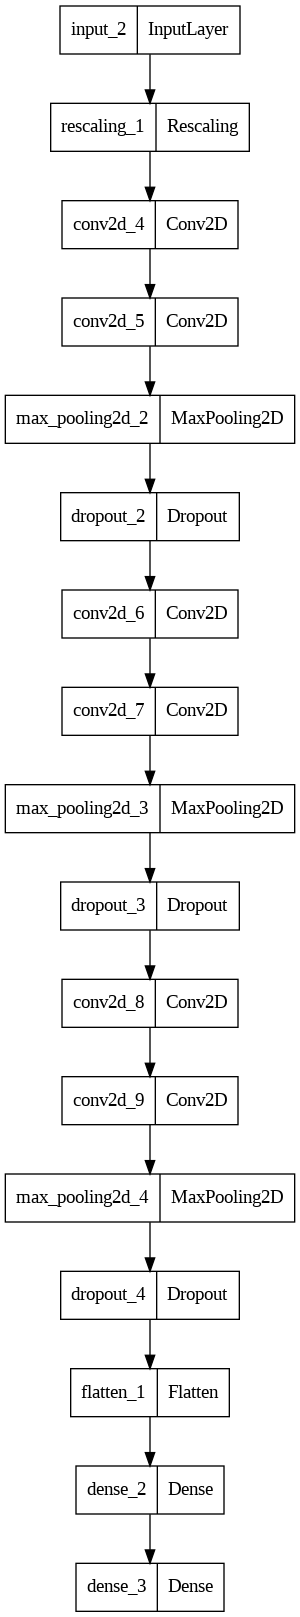

In [ ]:
keras.utils.plot_model(model)

In [ ]:
res = model.fit(training_set, epochs=30, validation_data=val_set)

Epoch 1/30
32/32 [==============================] - 14s 284ms/step - loss: 0.7063 - accuracy: 0.4885 - val_loss: 0.6931 - val_accuracy: 0.5020
Epoch 2/30
32/32 [==============================] - 9s 251ms/step - loss: 0.6928 - accuracy: 0.5130 - val_loss: 0.6899 - val_accuracy: 0.5000
Epoch 3/30
32/32 [==============================] - 8s 222ms/step - loss: 0.6940 - accuracy: 0.5380 - val_loss: 0.6930 - val_accuracy: 0.5070
Epoch 4/30
32/32 [==============================] - 8s 234ms/step - loss: 0.6914 - accuracy: 0.5550 - val_loss: 0.6909 - val_accuracy: 0.5460
Epoch 5/30
32/32 [==============================] - 9s 256ms/step - loss: 0.6913 - accuracy: 0.5790 - val_loss: 0.6902 - val_accuracy: 0.5410
Epoch 6/30
32/32 [==============================] - 7s 213ms/step - loss: 0.6865 - accuracy: 0.5625 - val_loss: 0.7099 - val_accuracy: 0.5030
Epoch 7/30
32/32 [==============================] - 8s 240ms/step - loss: 0.6853 - accuracy: 0.5835 - val_loss: 0.6781 - val_accuracy: 0.5930
Epoch

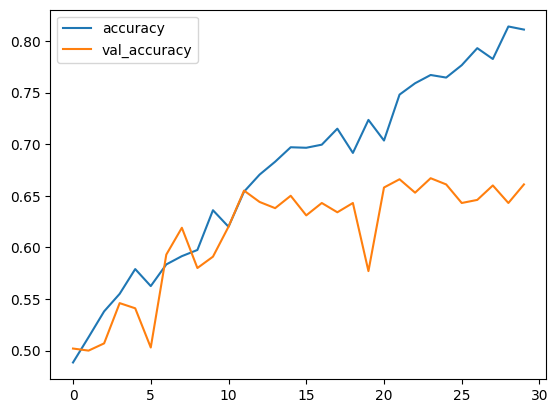

In [ ]:
plt.plot(res.history["accuracy"], label="accuracy")
plt.plot(res.history["val_accuracy"], label="val_accuracy")
plt.legend()
plt.show()

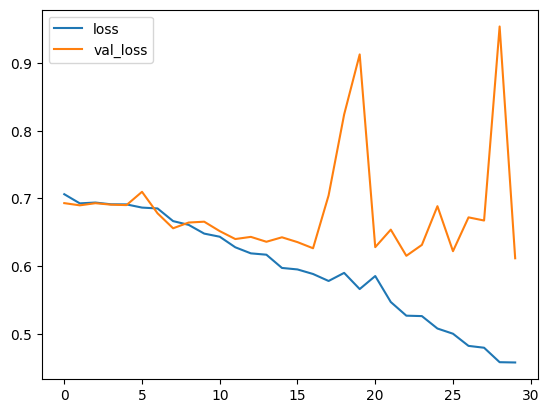

In [ ]:
plt.plot(res.history["loss"], label="loss")
plt.plot(res.history["val_loss"], label="val_loss")
plt.legend()
plt.show()